## 使用 CNN 做人臉識別

### 撰寫網路爬蟲取得圖片資料

In [2]:
import requests
res = requests.get('https://www.chinatimes.com/realtimenews/20190115005089-260404')
res

<Response [200]>

In [4]:
#res.text

In [5]:
url = 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2018/11/25/1/5581159.jpg&x=0&y=0&sw=0&sh=0&sl=W&fw=1050&exp=3600'
res = requests.get(url)
res

<Response [200]>

In [6]:
with open('chiling.jpg', 'wb') as f:
    f.write(res.content)

In [9]:
import requests
from bs4 import BeautifulSoup
res  = requests.get('https://www.google.com/search?ei=1ZaVXJDSBa6Rr7wP9p-xuA8&yv=3&tbm=isch&q=%E6%9E%97%E5%BF%97%E7%8E%B2&vet=10ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ.1ZaVXJDSBa6Rr7wP9p-xuA8.i&ved=0ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ&ijn=1&start=100&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc')
soup = BeautifulSoup(res.text, 'lxml')
#soup.select('img')

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [12]:
for rec in soup.select('img'):
    print(rec.get('src'))

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPbJ_ik29N84a9-Ha_UKReNSSIboFuPujREebJ4e7f668fXjCY
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWX7JEFgJOk75lOUGoWr9oz2rh2M6BuHQza7OovSzXrLgSzxGa
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQS47h49XG_9GSxj2IHd77hkZj8v5UbrsLYHk-fS-AvhvO5cef-
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROIEbru-fmUtv6vSrVjisnKAMwFgOFFH2Fw8mtesDUmOPBVHAUqg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRC4LcQpj42AiY1Yx9HRTjPzTKeeX8zhqpf8_QJGE5_bG9-fkT
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMyID85fMSI8twZk3cqpcXUDrXHBUNEw_lvLanQiimJzGI7Xkc
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYA6ItyGNwPhn0uBPQjQ1jOUswuoCAj3DERWA1PHdvvLjlKQy-
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFMPMfrtbyVdrIgSgc93VU20cpyAS1n11MDjgJUbOSoYFQDHUXtw
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJXeewCJPWh-54SOFr_tzSnDIY43Otfe0vwUem90YYjLVe92Tf
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd

In [13]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPbJ_ik29N84a9-Ha_UKReNSSIboFuPujREebJ4e7f668fXjCY'
res = requests.get(url)
with open('1.jpg', 'wb') as f:
    f.write(res.content)

In [14]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPbJ_ik29N84a9-Ha_UKReNSSIboFuPujREebJ4e7f668fXjCY'
res = requests.get(url)
fname = url.split('tbn:')[1]
with open('{}.jpg'.format(fname), 'wb') as f:
    f.write(res.content)

In [22]:
import requests
from bs4 import BeautifulSoup
url  = 'https://www.google.com/search?ei=1ZaVXJDSBa6Rr7wP9p-xuA8&yv=3&tbm=isch&q={}&vet=10ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ.1ZaVXJDSBa6Rr7wP9p-xuA8.i&ved=0ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
idolname = '金城武'
startpos = 0
res  = requests.get(url.format(idolname, startpos))
soup = BeautifulSoup(res.text, 'lxml')
for rec in soup.select('img'):
    #print(rec)
    if rec.get('src'):
        imgurl = rec.get('src')
    elif rec.get('data-src'):
        imgurl = rec.get('data-src')
    res   = requests.get(imgurl)
    fname = imgurl.split('tbn:')[1]
    with open('{}.jpg'.format(fname), 'wb') as f:
        f.write(res.content)

In [24]:
import requests
from bs4 import BeautifulSoup
import os

def getIdolPicture(idolname, pages, dest):
    # Create new destination directory
    if not os.path.exists(dest):
        os.mkdir(dest)
    url  = 'https://www.google.com/search?ei=1ZaVXJDSBa6Rr7wP9p-xuA8&yv=3&tbm=isch&q={}&vet=10ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ.1ZaVXJDSBa6Rr7wP9p-xuA8.i&ved=0ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
    # change page
    for i in range(pages):
        startpos = i * 100
        # get page info
        res  = requests.get(url.format(idolname, startpos))
        soup = BeautifulSoup(res.text, 'lxml')
        # get picture
        for rec in soup.select('img'):
            #print(rec)
            if rec.get('src'):
                imgurl = rec.get('src')
            elif rec.get('data-src'):
                imgurl = rec.get('data-src')
            res   = requests.get(imgurl)
            fname = imgurl.split('tbn:')[1]
            with open('{}/{}.jpg'.format(dest,fname), 'wb') as f:
                f.write(res.content)

In [27]:
getIdolPicture('林志玲', 3, 'chiling')

In [28]:
getIdolPicture('周子瑜', 3, 'tzuyu')

In [29]:
getIdolPicture('徐若瑄', 3, 'vivian')

###  使用Opencv 截取人臉
- https://download.lfd.uci.edu/pythonlibs/u2hcgva4/opencv_python-3.4.5-cp36-cp36m-win_amd64.whl
- ! pip install opencv_python-3.4.5-cp36-cp36m-win_amd64.whl

### Haar cascade
- https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

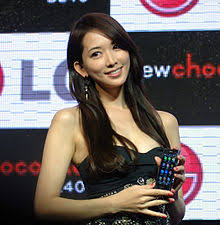

In [53]:
from PIL import Image
im = Image.open('chiling/ANd9GcQ0cZH9Ij5j_hbrIAxSEJiWgsTdBBuJsLwcvkN4ZshFmTj34pX51w.jpg')
im

In [32]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('chiling/ANd9GcQ0cZH9Ij5j_hbrIAxSEJiWgsTdBBuJsLwcvkN4ZshFmTj34pX51w.jpg')
img.shape

(225, 220, 3)

In [36]:
?face_cascade.detectMultiScale

In [46]:
faces = face_cascade.detectMultiScale(img, 1.1, 1)

In [47]:
faces

array([[80, 30, 55, 55]], dtype=int32)

In [49]:
x,y,w,h = faces[0]

In [50]:
box = (x, y, x+w, y+h)

In [54]:
crpim = im.crop(box).resize((64,64))

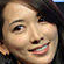

In [56]:
crpim

In [57]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('chiling/ANd9GcRCmpPlP3fPUKlA10tc7UEwjF8rdnsXOpb12rJZitnCVx6sbjSt.jpg')
img.shape

(168, 300, 3)

In [58]:
faces = face_cascade.detectMultiScale(img, 1.1, 1)

In [59]:
faces

array([[12, 16, 52, 52],
       [71, 29, 78, 78]], dtype=int32)

In [60]:
len(faces)

2

In [64]:
src  = 'chiling/'
dest = 'chiling_face/'
if not os.path.exists(dest):
    os.mkdir(dest)
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

for filename in os.listdir(src):
    #print(src + filename)
    img = cv.imread(src + filename)
    faces = face_cascade.detectMultiScale(img, 1.1, 1)
    if len(faces) == 1:
        im      = Image.open(src + filename)
        x,y,w,h = faces[0]
        box     = (x, y, x+w, y+h)
        crpim   = im.crop(box).resize((64,64))
        crpim.save(dest + filename)

In [65]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.1, 1)
        if len(faces) == 1:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)

In [ ]:
cropIdolFace('chiling/', 'chiling_face/')

In [66]:
cropIdolFace('tzuyu/', 'tzuyu_face/')

In [67]:
cropIdolFace('vivian/', 'vivian_face/')

### 建構卷積神經網路(CNN)

In [75]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu',padding = 'same'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu',padding = 'same'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [76]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

### 圖像增廣技術

In [77]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [78]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### 將資料分為訓練與測試資料集

In [86]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [80]:
import os
len(list(os.listdir('chiling_face/')))
dataset = list(os.listdir('chiling_face/'))

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)

In [82]:
len(train_data)

109

In [83]:
len(test_data)

28

In [87]:
if not os.path.exists('train/chiling_face/'):
    os.mkdir('train/chiling_face/')
if not os.path.exists('test/chiling_face/'):
    os.mkdir('test/chiling_face/')
    
for f in train_data:
    os.rename('chiling_face/' + f, 'train/chiling_face/' + f)
for f in test_data:
    os.rename('chiling_face/' + f, 'test/chiling_face/' + f)

In [88]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [89]:
splitDataset('chiling_face/')

In [90]:
splitDataset('tzuyu_face/')

In [91]:
splitDataset('vivian_face/')

In [92]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 30,
     class_mode = 'categorical')

Found 355 images belonging to 3 classes.


In [93]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 30, 
    class_mode = 'categorical')

Found 91 images belonging to 3 classes.


### 訓練神經網路

In [102]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=30,
                         steps_per_epoch = 30,
                         verbose = 1,
                         validation_data = test_set)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=30, verbose=1, validation_data=<keras_pre..., epochs=10, validation_steps=30)`
  


Epoch 1/10
30/30 [==============================] - 6s 185ms/step - loss: 0.0208 - acc: 0.9889 - val_loss: 2.2769 - val_acc: 0.7515
Epoch 2/10
30/30 [==============================] - 5s 169ms/step - loss: 0.0208 - acc: 0.9933 - val_loss: 2.1997 - val_acc: 0.7245
Epoch 3/10
30/30 [==============================] - 5s 156ms/step - loss: 0.0163 - acc: 0.9931 - val_loss: 2.1510 - val_acc: 0.7560
Epoch 4/10
30/30 [==============================] - 5s 158ms/step - loss: 0.0269 - acc: 0.9911 - val_loss: 2.2657 - val_acc: 0.7245
Epoch 5/10
30/30 [==============================] - 5s 161ms/step - loss: 0.0208 - acc: 0.9911 - val_loss: 2.0672 - val_acc: 0.7590
Epoch 6/10
30/30 [==============================] - 5s 158ms/step - loss: 0.0362 - acc: 0.9889 - val_loss: 2.1461 - val_acc: 0.7030
Epoch 7/10
30/30 [==============================] - 5s 168ms/step - loss: 0.0333 - acc: 0.9878 - val_loss: 1.9148 - val_acc: 0.7605
Epoch 8/10
30/30 [==============================] - 5s 171ms/step - loss: 0.

### 使用模型分類圖片

In [145]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('predict.jpg')
img.shape

(768, 1366, 3)

In [146]:
faces = face_cascade.detectMultiScale(img, 1.5, 1)

In [147]:
faces

array([[632, 303, 273, 273],
       [444, 148,  81,  81]], dtype=int32)

In [148]:
im = Image.open('predict.jpg')
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = im.crop(box).resize((64,64))
crpim.save('predict_face.jpg')

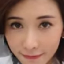

In [149]:
crpim

In [150]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [151]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [152]:
classifier.predict_classes(test_image)

array([0], dtype=int64)

In [153]:
training_set.class_indices

{'chiling_face': 0, 'tzuyu_face': 1, 'vivian_face': 2}

### Rename

In [154]:
import os
os.rename('1.jpg','1_test.jpg')

In [155]:
os.mkdir('tmp')

In [157]:
os.rename('1_test.jpg', 'tmp/1_test.jpg')

FileNotFoundError: [WinError 2] 系統找不到指定的檔案。: '1_test.jpg' -> 'tmp/1_test.jpg'

In [158]:
import shutil
shutil.copy('tmp/1_test.jpg','1_test.jpg')

'1_test.jpg'

## 語音辨識
- https://github.com/ywchiu/tibamedl/blob/master/CNN/Speech%20Recognition%20With%20Keras.ipyn

### 安裝librosa

In [159]:
! pip install librosa

  Running setup.py bdist_wheel for librosa: started
  Running setup.py bdist_wheel for librosa: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ce\49\68\87ba660f30e3977f0778e39ee2e944629cd37c2a0ce41f9ff1
  Running setup.py bdist_wheel for audioread: started
  Running setup.py bdist_wheel for audioread: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\53\02\90\7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy: started
  Running setup.py bdist_wheel for resampy: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ff\4f\ed\2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [161]:
! pip install tqdm

distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [162]:
import librosa
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm

In [164]:
def get_labels(path='data'):
    labels = os.listdir(path)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)

In [165]:
wave, sr = librosa.load('data/cat/00b01445_nohash_0.wav', mono=True, sr=None)

In [167]:
wave.shape

(16000,)

In [168]:
mfcc = librosa.feature.mfcc(wave, sr=16000)

In [170]:
mfcc.shape

(20, 32)

In [171]:
def wav2mfcc(file_path, max_len=11):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=16000)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

In [173]:
def save_data_to_array(path='data', max_len=11):
    labels, _, _ = get_labels(path)

    for label in labels:
        # Init mfcc vectors
        mfcc_vectors = []

        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = wav2mfcc(wavfile, max_len=max_len)
            mfcc_vectors.append(mfcc)
        np.save(label + '.npy', mfcc_vectors)

### 準備訓練與測試資料集

In [194]:
def get_train_test(split_ratio=0.6, random_state=42):
    # Get available labels
    labels, indices, _ = get_labels(DATA_PATH)
    print(labels)
    # Getting first arrays
    X = np.load(DATA_PATH + labels[0]   )
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(DATA_PATH + label )
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

In [195]:
def prepare_dataset(path='data'):
    labels, _, _ = get_labels(path)
    data = {}
    for label in labels:
        data[label] = {}
        data[label]['path'] = [path  + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]

        vectors = []

        for wavfile in data[label]['path']:
            wave, sr = librosa.load(wavfile, mono=True, sr=None)
            # Downsampling
            wave = wave[::3]
            mfcc = librosa.feature.mfcc(wave, sr=16000)
            vectors.append(mfcc)

        data[label]['mfcc'] = vectors

    return data

In [196]:
def load_dataset(path='data'):
    data = prepare_dataset(path)

    dataset = []

    for key in data:
        for mfcc in data[key]['mfcc']:
            dataset.append((key, mfcc))

    return dataset[:100]

In [202]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

DATA_PATH = "./data/"
# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
# save_data_to_array(max_len=feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

['bed.npy', 'cat.npy', 'happy.npy']


In [203]:
X_train.shape

(3112, 20, 11)

In [204]:
# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 10
batch_size = 100
num_classes = 3

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [206]:
X_train.shape

(3112, 20, 11, 1)

In [208]:
y_train_hot.shape

(3112, 3)

In [209]:
model = Sequential()
# convolution
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))

# mat pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flattening
model.add(Flatten())

# fully connected
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

In [210]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [211]:
model.fit(X_train, y_train_hot, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(X_test, y_test_hot))

Train on 3112 samples, validate on 2076 samples
Epoch 1/10
3112/3112 [==============================] - ETA: 15s - loss: 6.1586 - acc: 0.34 - ETA: 8s - loss: 4.6280 - acc: 0.3400 - ETA: 6s - loss: 4.0750 - acc: 0.343 - ETA: 5s - loss: 3.6948 - acc: 0.342 - ETA: 4s - loss: 3.4185 - acc: 0.350 - ETA: 3s - loss: 3.2105 - acc: 0.351 - ETA: 3s - loss: 2.9652 - acc: 0.358 - ETA: 3s - loss: 2.7868 - acc: 0.356 - ETA: 2s - loss: 2.6646 - acc: 0.350 - ETA: 2s - loss: 2.5398 - acc: 0.350 - ETA: 2s - loss: 2.4260 - acc: 0.350 - ETA: 2s - loss: 2.3417 - acc: 0.350 - ETA: 2s - loss: 2.2612 - acc: 0.353 - ETA: 1s - loss: 2.1839 - acc: 0.355 - ETA: 1s - loss: 2.1210 - acc: 0.354 - ETA: 1s - loss: 2.0678 - acc: 0.356 - ETA: 1s - loss: 2.0163 - acc: 0.362 - ETA: 1s - loss: 1.9714 - acc: 0.362 - ETA: 1s - loss: 1.9296 - acc: 0.361 - ETA: 1s - loss: 1.8855 - acc: 0.365 - ETA: 1s - loss: 1.8462 - acc: 0.368 - ETA: 0s - loss: 1.8122 - acc: 0.371 - ETA: 0s - loss: 1.7785 - acc: 0.373 - ETA: 0s - loss: 1.748

3112/3112 [==============================] - ETA: 2s - loss: 0.2606 - acc: 0.890 - ETA: 2s - loss: 0.2044 - acc: 0.920 - ETA: 2s - loss: 0.2087 - acc: 0.923 - ETA: 2s - loss: 0.2348 - acc: 0.917 - ETA: 2s - loss: 0.2363 - acc: 0.910 - ETA: 2s - loss: 0.2359 - acc: 0.905 - ETA: 2s - loss: 0.2408 - acc: 0.910 - ETA: 2s - loss: 0.2593 - acc: 0.906 - ETA: 1s - loss: 0.2462 - acc: 0.912 - ETA: 1s - loss: 0.2638 - acc: 0.906 - ETA: 1s - loss: 0.2693 - acc: 0.902 - ETA: 1s - loss: 0.2667 - acc: 0.905 - ETA: 1s - loss: 0.2694 - acc: 0.903 - ETA: 1s - loss: 0.2745 - acc: 0.902 - ETA: 1s - loss: 0.2723 - acc: 0.902 - ETA: 1s - loss: 0.2725 - acc: 0.902 - ETA: 1s - loss: 0.2712 - acc: 0.901 - ETA: 1s - loss: 0.2694 - acc: 0.903 - ETA: 1s - loss: 0.2714 - acc: 0.903 - ETA: 0s - loss: 0.2716 - acc: 0.904 - ETA: 0s - loss: 0.2661 - acc: 0.907 - ETA: 0s - loss: 0.2680 - acc: 0.908 - ETA: 0s - loss: 0.2677 - acc: 0.908 - ETA: 0s - loss: 0.2695 - acc: 0.905 - ETA: 0s - loss: 0.2703 - acc: 0.906 - ETA: 

In [212]:
# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

In [213]:
predict('0ab3b47d_nohash_0.wav', model)

'happy.npy'

## 使用遞歸神經網路預測股票

### 使用Pandas DataReader
- ! pip install pandas-datareader

In [214]:
! pip install pandas-datareader

distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import pandas_datareader
dataset = pandas_datareader.get_data_yahoo('2330.TW')

In [2]:
dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-18,241.0,239.0,239.5,241.0,26856532.0,241.0
2019-03-19,240.5,238.0,239.0,240.5,14479009.0,240.5
2019-03-20,242.0,239.5,242.0,242.0,22975971.0,242.0
2019-03-21,245.5,241.0,242.5,245.5,26179502.0,245.5
2019-03-22,248.5,244.5,248.0,248.5,22931467.0,248.5


Populating the interactive namespace from numpy and matplotlib


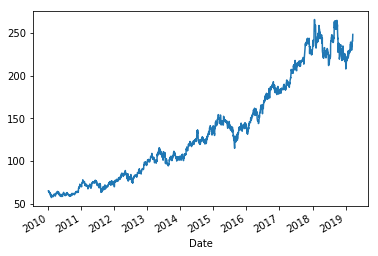

In [3]:
%pylab inline
dataset['Close'].plot(kind = 'line')

In [4]:
dataset['Close'].count()

2263

In [5]:
2263 * 0.8

1810.4

In [6]:
trainset = dataset.iloc[0:1800,3:4]

In [7]:
testset  = dataset.iloc[1800:,3:4]

In [8]:
len(trainset)

1800

In [9]:
len(testset)

463

In [10]:
trainset.shape

(1800, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(trainset)

In [12]:
training_set_scaled

array([[0.05587809],
       [0.05297532],
       [0.05587809],
       ...,
       [0.97097242],
       [0.98548621],
       [0.99637155]])

In [13]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train.shape

(1740, 60)

In [15]:
y_train.shape

(1740,)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train.shape

(1740, 60, 1)

In [18]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1740/1740 [==============================] - 6s 4ms/step - loss: 0.0374
Epoch 2/100
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0038
Epoch 3/100
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0031
Epoch 4/100
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0031
Epoch 5/100
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 6/100
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 7/100
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 8/100
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 9/100
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0023
Epoch 10/100
1056/1740 [=================>............] - ETA: 1s - loss: 0.0030